# Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

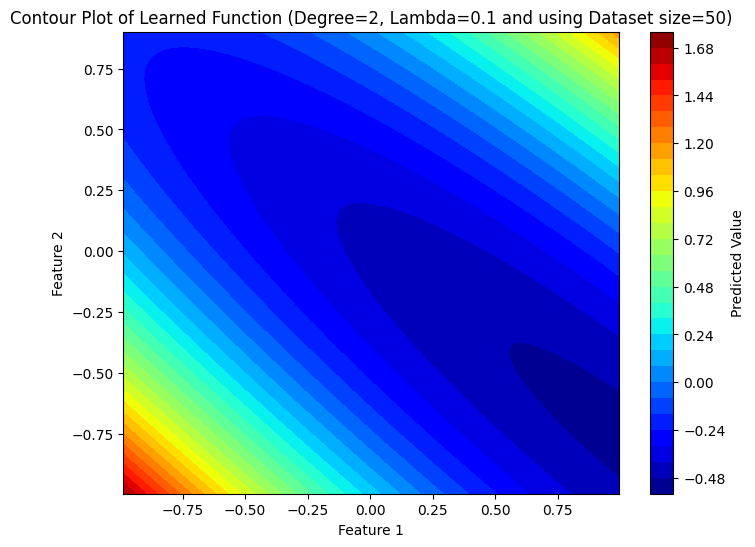

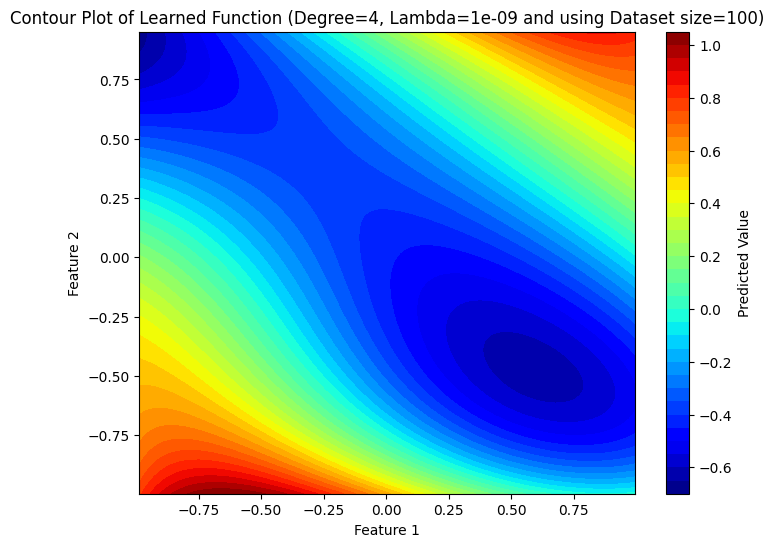

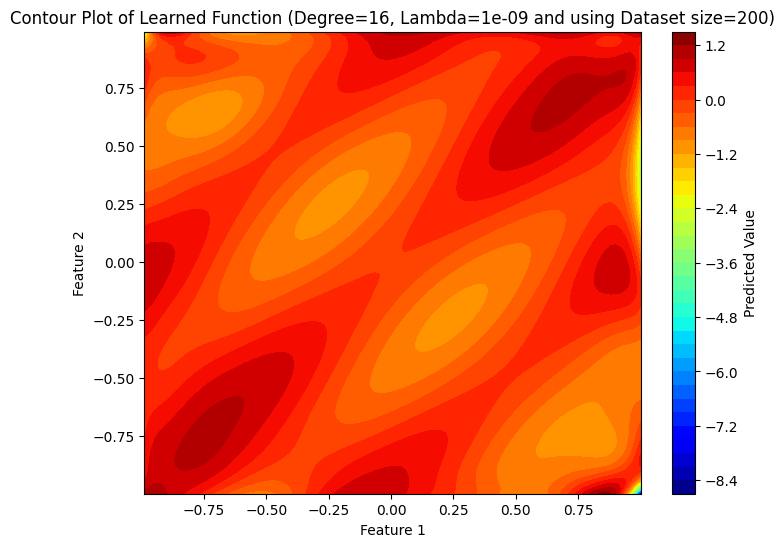

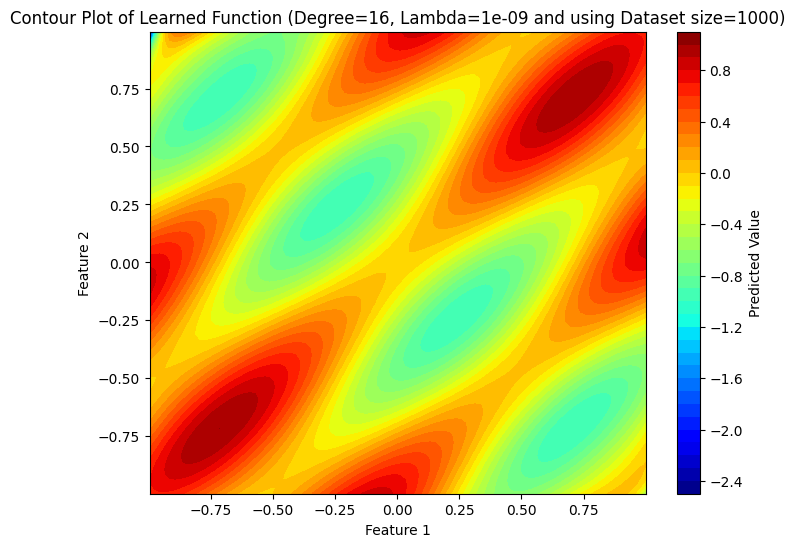

In [2]:
def polynomial_features(X, degree):
    features = np.ones((X.shape[0], 1))
    if degree == 1:
        features = (np.hstack((features,X)))
        return features
    else:
        for i in range(0, degree + 1):
            for j in range(degree+1-i):
                new_feature = ((X[:,0]**i)*(X[:,1]**j)).reshape(-1,1)
                if i==0 and j==0:
                    pass
                else:
                    features = (np.concatenate([features,new_feature],axis=1))
        return features  


    
def ridge_regression(X, y, lamb):
    X_t = X.T
    identity = np.eye(X.shape[1])
    w = np.linalg.inv(X_t @ X + lamb * identity)@(X_t @ y)
    return w

def squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

data3_1 = np.load('Data/dataset3_1.npz')
X_train, Y_train, X_test, Y_test = data3_1['arr_0'],data3_1['arr_1'],data3_1['arr_2'],data3_1['arr_3']

subset_sizes = [50,100,200,1000]
degrees = [1,2,4,8,16]

reg_parameters = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

test_sq_error = np.zeros((len(subset_sizes),len(degrees), len(reg_parameters)))
train_sq_error = np.zeros_like(test_sq_error)
best_algorithm = np.zeros((4,2))

for i in range(len(subset_sizes)):


  best_error = np.inf
  best_degree = None
  best_lambda = None

  for d in range(len(degrees)):
    phi=polynomial_features(X_train[:subset_sizes[i],:],degrees[d])
    for r in range(len(reg_parameters)):
       w = ridge_regression(phi, Y_train[:subset_sizes[i]], reg_parameters[r])
       
       y_train_pred = phi@w
       
       train_sq_error[i,d,r] = squared_error(y_train_pred, Y_train[:subset_sizes[i]])
       y_test_pred = (polynomial_features(X_test,degrees[d]))@w
       
       test_sq_error[i,d,r] = squared_error(y_test_pred, Y_test)
       
       if test_sq_error[i,d,r] < best_error:
        best_error = test_sq_error[i,d,r]
        best_degree = d
        best_lambda = r

#   print(train_sq_error)
#   print(test_sq_error)
#   print(best_error)
#   print("Best degree: ", degrees[best_degree])
#   print("Best lambda: ", reg_parameters[best_lambda])

  xx = (np.linspace(np.min(X_train[:subset_sizes[i],0]), np.max(X_train[:subset_sizes[i],0]), 100))
  yy = (np.linspace(np.min(X_train[:subset_sizes[i],1]), np.max(X_train[:subset_sizes[i],1]), 100))
  X,Y=np.meshgrid(xx,yy)
  xx_ = X.copy().reshape(-1,1)
  yy_ = Y.copy().reshape(-1,1)
  X_test_ = np.concatenate([xx_,yy_],axis=1)
  phi_1=polynomial_features(X_train[:subset_sizes[i],:],degrees[best_degree])
  w_ = ridge_regression(phi_1, Y_train[:subset_sizes[i]], reg_parameters[best_lambda])
  phi_2= polynomial_features(X_test_,degrees[best_degree])
  Z=phi_2@w_
  plt.figure(figsize=(8, 6))
  plt.title(f"Contour Plot of Learned Function (Degree={degrees[best_degree]}, Lambda={reg_parameters[best_lambda]} and using Dataset size={subset_sizes[i]})")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.contourf(xx, yy, Z.reshape(100,100), levels=35, cmap='jet')
  plt.colorbar(label="Predicted Value")
  plt.show()





**Dataset size:50**

MSE train

lambda ->  |  1e-9 |   1e-7|   1e-5 |  1e-3 |  1e-1 | 1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1 | 0.250383 | 0.250383 | 0.250383 | 0.250383 | 0.250384 | 0.255898
Degree 2 | 0.134112 | 0.134112 | 0.134112 | 0.134112 | 0.134213 | 0.197483
Degree 4 | 0.102018 | 0.102018 | 0.102018 | 0.102019 | 0.104107 | 0.180638
Degree 8 | 0.000133 | 0.000199 | 0.010766 | 0.041721 | 0.081991 | 0.163200
Degree 16 | 0.000000 | 0.000009 | 0.001318 | 0.031113 | 0.070021 | 0.150013

MSE test

lambda ->  |  1e-9 |   1e-7|   1e-5 |  1e-3 |  1e-1 | 1e1
--- | --- | --- |--- |--- |--- |--- 
Degree 1 | 0.301267 | 0.301267 | 0.301267 | 0.301262 | 0.300838 | 0.278351 
Degree 2 | 0.157900 | 0.157900 | 0.157900 | 0.157886 | 0.156735 | 0.208224 
Degree 4 | 0.157334 | 0.157334 | 0.157333 | 0.157243 | 0.161826 | 0.196569 
Degree 8 | 237.690059 | 172.501862 | 18.594254 | 0.990251 | 0.165156 | 0.193919 
Degree 16 | 249.851604 | 232.022764 | 66.697684 | 2.337308 | 0.203961 | 0.196057 

Least error: 0.15673525917060369

Best degree:  2

Best lambda:  0.1

**Dataset size: 100**

MSE train

lambda -> | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 
--- | --- | --- | --- | --- | --- | --- |
Degree 1 | 0.258091 | 0.258091 | 0.258091 | 0.258091 | 0.258091 | 0.258740  
Degree 2 | 0.130951 | 0.130951 | 0.130951 | 0.130951 | 0.130966 | 0.164968  
Degree 4 | 0.113027 | 0.113027 | 0.113027 | 0.113027 | 0.113651 | 0.152373  
Degree 8 | 0.041588 | 0.041588 | 0.041680 | 0.058008 | 0.092902 | 0.144886  
Degree 16 | 0.000008 | 0.000484 | 0.007544 | 0.041729 | 0.083697 | 0.139544 

MSE Test

lambda ->| 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 
--- | --- | --- | --- | --- | --- | --- |
Degree 1 | 0.273149 | 0.273149 | 0.273149 | 0.273148 | 0.273083 | 0.268622 
Degree 2 | 0.153210 | 0.153210 | 0.153210 | 0.153207 | 0.152916 | 0.175709  
Degree 4 | 0.142776 | 0.142776 | 0.142776 | 0.142808 | 0.146020 | 0.168980  
Degree 8 | 0.712916 | 0.711320 | 0.580759 | 0.203638 | 0.162628 | 0.171168  
Degree 16 | 54.082236 | 11.770418 | 23.416589 | 0.417849 | 0.188359 | 0.174160  

Least error: 0.14277575186837826

Best degree:  4

Best lambda:  1e-09

**Dataset size:200**

MSE Train

lambda ->| 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 
--- | --- | --- | --- | --- | --- | --- |
Degree 1 | 0.246535 | 0.246535 | 0.246535 | 0.246535 | 0.246535 | 0.246641  
Degree 2 | 0.133665 | 0.133665 | 0.133665 | 0.133665 | 0.133669 | 0.147549  
Degree 4 | 0.113338 | 0.113338 | 0.113338 | 0.113338 | 0.113590 | 0.144444  
Degree 8 | 0.061737 | 0.061737 | 0.061738 | 0.063950 | 0.095687 | 0.141193  
Degree 16 | 0.000029 | 0.001085 | 0.011326 | 0.044463 | 0.083500 | 0.133763 

MSE Test

lambda ->| 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 
--- | --- | --- | --- | --- | --- | --- |
Degree 1 | 0.267663 | 0.267663 | 0.267663 | 0.267663 | 0.267646 | 0.266225 
Degree 2 | 0.145781 | 0.145781 | 0.145781 | 0.145780 | 0.145754 | 0.158682  
Degree 4 | 0.131171 | 0.131171 | 0.131171 | 0.131164 | 0.130831 | 0.157085  
Degree 8 | 0.137363 | 0.137359 | 0.136982 | 0.118183 | 0.113965 | 0.156451  
Degree 16 | 0.037150 | 0.083710 | 0.170807 | 0.086904 | 0.111214 | 0.152244  

Least error: 0.037150040617885315

Best degree:  16

Best lambda:  1e-09

**Dataset size:1000**

MSE Train

| lambda -> | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
| --- | --- | --- | --- | --- | --- | --- |
Degree 1 | 0.240728 | 0.240728 | 0.240728 | 0.240728 | 0.240728 | 0.240729 | 
Degree 2 | 0.138824 | 0.138824 | 0.138824 | 0.138824 | 0.138824 | 0.139718 | 
Degree 4 | 0.125017 | 0.125017 | 0.125017 | 0.125017 | 0.125025 | 0.134172 | 
Degree 8 | 0.076743 | 0.076743 | 0.076743 | 0.076846 | 0.094838 | 0.128438 | 
Degree 16 | 0.000025 | 0.000445 | 0.006533 | 0.038415 | 0.084993 | 0.121687 | 

MSE Test

| lambda -> | 1e-9 | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 |
| --- | --- | --- | --- | --- | --- | --- |
Degree 1 | 0.262535 | 0.262535 | 0.262535 | 0.262535 | 0.262535 | 0.262530 | 
Degree 2 | 0.142429 | 0.142429 | 0.142429 | 0.142429 | 0.142442 | 0.144519 | 
Degree 4 | 0.127080 | 0.127080 | 0.127080 | 0.127081 | 0.127242 | 0.140937 | 
Degree 8 | 0.084813 | 0.084813 | 0.084800 | 0.083913 | 0.097823 | 0.134989 | 
Degree 16 | 0.001198 | 0.001490 | 0.010957 | 0.049658 | 0.090737 | 0.127821 | 

Least error: 0.0011977298136789172

Best degree:  16

Best lambda:  1e-09

**Observations**

1. MSE for training data is always lowest for polynomial of degree 16 and $\lambda$ = 1e-9. The MSE decreses as the degree of polynomials increases and the regularisation parameter decreases. This is because polynomial with higher degree and lower regularisation parameter will always fit the data better. But such polynomial fail to generalize and hence they produce a high error in 

2. But as the dataset size increase the higher degree polynomials work well as they are able to generalize well. This is why we observe that the best degree is 16 and the regularisation parameter is 1e-9 for dataset sizes 200 and 1000.


